Simulation finished!!!

In [34]:
using HDF5
using ITensors
using LinearAlgebra
using Plots
using ITensorMPS
using Observers
using LaTeXStrings
plot_font = "Computer Modern";

In [35]:
N = 30 # System size
J1 = 2; # Hopping parameters
J2 = 0.2;
h=2;
#PBC = 0; # Periodic boundary conditions

# Define N S=1/2 spin indices
sites = siteinds("S=1/2",N);

In [36]:

T = 1.5  # Final time
δt = 0.01   # Time step
time = 0.0:δt:T   # Time vector
tbigstep = 10   # Calculate expectation values each tbigstep times
num_expvals = Int(((length(time)-1)/tbigstep)) + 1; # Number of times expectation values will be calculated. The ±1 is to account correctly for t = 0  
cutoff = 1E-10;   # Truncation allowed per step
χ = 300; # Maximum bond dimension

In [37]:
E0 = zeros(num_expvals); # Norm of evolved state
#Popul = zeros(num_expvals,N); # Number of bosons per site
#Coherences = zeros(num_expvals,N,N)+1im*zeros(num_expvals,N,N); # Coherences between all sites, can be complex
Time_expvals = zeros(num_expvals,1); # Time of expectation values

In [38]:
function Hamiltonian(N,sites,J1,J2,h)

    # Initiate construction
    ops = OpSum()

    # Hopping terms
    for j=1:N-1
        ops += J1,"Sz",j,"Sz",j+1
        ops += J1,"Sz",j,"Sz",j+1    
    end
    for j=1:N-2
        ops += J2,"Sz",j,"Sz",j+2
        ops += J2,"Sz",j,"Sz",j+2    
    end
    for j=1:N
        ops += -h,"Sx",j
    end

    # PBC if required
   

    H = MPO(ops,sites);
    
    return H;
    
end;

In [39]:
function InitialState(sites,N)
    
    state = [isodd(n) ? "Up" : "Dn" for n=1:N];
    ψi = MPS(sites,state);
    
    return ψi;
end

InitialState (generic function with 1 method)

In [40]:
H = Hamiltonian(N,sites,J1,J2,h);
#ψ0 = InitialState(sites,N);
ψ0 = randomMPS(sites,linkdims=10);

In [41]:
ψ = ψ0

count_expvals = 1;

for t in 1:length(time)-1
    
    ψ = tdvp(H, -1 * δt, ψ; time_step = -1* δt, cutoff = cutoff, maxdim = χ, outputlevel=0, normalize=true);
    
    normalize!(ψ)
    
    if(mod(t,tbigstep)== 0)
       
        println("Calculating expectation values for $(t) number of steps")
        count_expvals = count_expvals + 1;

        Time_expvals[count_expvals] = t*δt;
        #normalize!(ψ)
        # The state is not normalized, just the expectation values in the function
        E0[count_expvals ] = real(inner(ψ',H,ψ));
    end
    
end;

Calculating expectation values for 10 number of steps
Calculating expectation values for 20 number of steps
Calculating expectation values for 30 number of steps
Calculating expectation values for 40 number of steps
Calculating expectation values for 50 number of steps
Calculating expectation values for 60 number of steps
Calculating expectation values for 70 number of steps
Calculating expectation values for 80 number of steps
Calculating expectation values for 90 number of steps
Calculating expectation values for 100 number of steps
Calculating expectation values for 110 number of steps
Calculating expectation values for 120 number of steps
Calculating expectation values for 130 number of steps
Calculating expectation values for 140 number of steps
Calculating expectation values for 150 number of steps


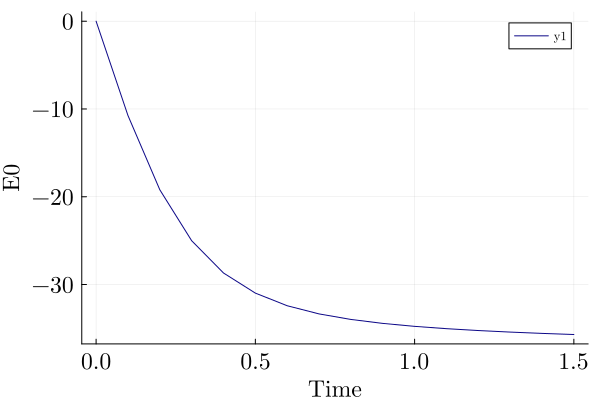

In [42]:
plot(Time_expvals,E0, xlabel = "Time", ylabel = "E0", xtickfontsize = 15, ytickfontsize = 15, xguidefontsize = 15, yguidefontsize = 15, colorbar_tickfontsize = 15, c = :plasma, fontfamily=plot_font)

In [43]:
H2 = real(inner(H,ψ,H,ψ));
H1=real(inner(ψ',H,ψ))

var = H2-H1^2;
@show var
@show H1

var = 0.5953744799660399
H1 = -35.69629231020713


-35.69629231020713

In [44]:
ψ = ψ0

count_expvals = 1;
N_f=2e2;
ni=1;
while var>1e-6 && ni<N_f
    
    
    ψ = tdvp(H, -1 * δt, ψ; time_step = -1* δt, cutoff = cutoff, maxdim = χ, outputlevel=0, normalize=true);
    
    normalize!(ψ)
    H2 = real(inner(H,ψ,H,ψ));
    H1=real(inner(ψ',H,ψ));
    var = H2-H1^2;

    if(mod(ni,tbigstep)== 0)
       
        println("Calculating expectation values for $(ni) number of steps and var=$(var)")
        count_expvals = count_expvals + 1;

       # Time_expvals[count_expvals] = ni*δt;
        #normalize!(ψ)
        # The state is not normalized, just the expectation values in the function
        #E0[count_expvals ] = real(inner(ψ',H,ψ));
    end
    
    ni=ni+1;
    
end;
@show H1

Calculating expectation values for 10 number of steps and var=48.52785283063706
Calculating expectation values for 20 number of steps and var=35.55530065721467
Calculating expectation values for 30 number of steps and var=23.045624237661173
Calculating expectation values for 40 number of steps and var=14.387643369362536
Calculating expectation values for 50 number of steps and var=8.973132583719007
Calculating expectation values for 60 number of steps and var=5.7018583680223855
Calculating expectation values for 70 number of steps and var=3.7709845403858253
Calculating expectation values for 80 number of steps and var=2.6270435246328816
Calculating expectation values for 90 number of steps and var=1.9269414786756442
Calculating expectation values for 100 number of steps and var=1.4778990545250963
Calculating expectation values for 110 number of steps and var=1.1756640438979957
Calculating expectation values for 120 number of steps and var=0.9630602492813978
Calculating expectation valu

-36.125676066857295

In [61]:
using Pkg; Pkg.add("QTTOperation")

LoadError: The following package names could not be resolved:
 * QTTOperation (not found in project, manifest or registry)

In [48]:
import TensorCrossInterpolation as TCI
f(v) = 1/(1 + v' * v)
# There are 8 tensor indices, each with values 1...10
localdims = fill(10, 8)
tolerance = 1e-8
tci, ranks, errors = TCI.crossinterpolate2(Float64, f, localdims; tolerance=tolerance)

(TensorCrossInterpolation.TensorCI2{Float64} with rank 12, [12, 12, 12], [8.648364522179481e-9, 4.396554450394086e-9, 4.396554450394086e-9])

In [50]:
originalvalue = f([1, 2, 3, 4, 5, 6, 7, 8])
interpolatedvalue = tci([1, 2, 3, 4, 5, 6, 7, 8])

0.004878048786072432

In [51]:
import TensorCrossInterpolation as TCI
f(v) = 1/(1 + v' * v)
localdims = fill(10, 5)    # There are 5 tensor indices, each with values 1...10
tolerance = 1e-8
tci, ranks, errors = TCI.crossinterpolate2(Float64, f, localdims; tolerance=tolerance)
println(tci)

TensorCrossInterpolation.TensorCI2{Float64} with rank 11


In [52]:
println("Original function: $(f([1, 2, 3, 4, 5]))")
println("TCI approximation: $(tci([1, 2, 3, 4, 5]))")

Original function: 0.017857142857142856
TCI approximation: 0.017857142857142853


In [53]:
function f(x)
    return 1e3 * cos(10 * sum(x .^ 2)) * exp(-sum(x)^4 / 1e3)
end
I = TCI.integrate(Float64, f, fill(-1.0, 10), fill(+1.0, 10); GKorder=15, tolerance=1e-8)
println("GK15 integral value: $I")

GK15 integral value: -5.496232625865567


In [56]:
using QuanticsTCI
f(x, y) = (cos(x) - cos(x - 2y)) * abs(x + y)
xvals = range(-6, 6; length=256)
yvals = range(-12, 12; length=256)
qtt, ranks, errors = quanticscrossinterpolate(Float64, f, [xvals, yvals]; tolerance=1e-8)

(QuanticsTCI.QuanticsTensorCI2{Float64}(TensorCrossInterpolation.TensorCI2{Float64} with rank 24, QuanticsGrids.DiscretizedGrid{2}(8, (-6.0, -12.0), (6.0, 12.0), 2, :interleaved, true), TensorCrossInterpolation.CachedFunction{Float64, UInt128} with 8888 entries), [19, 24, 24, 24], [3.330505252797329e-15, 4.286381595535798e-15, 4.286381595535783e-15, 4.286381595535783e-15])

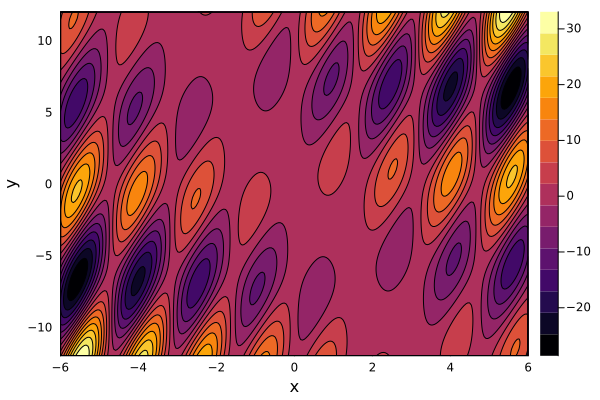

In [57]:
using Plots
qttvals = qtt.(1:256, collect(1:256)')
contour(xvals, yvals, qttvals, fill=true)
xlabel!("x")
ylabel!("y")

0.08690666216344844

┌ Warning: The option `pivottolerance` of `optimize!(tci::TensorCI2, f)` is deprecated. Please update your code to use `tolerance`, as `pivottolerance` will be removed in the future.
└ @ TensorCrossInterpolation ~/.julia/packages/TensorCrossInterpolation/RnYi9/src/tensorci2.jl:683


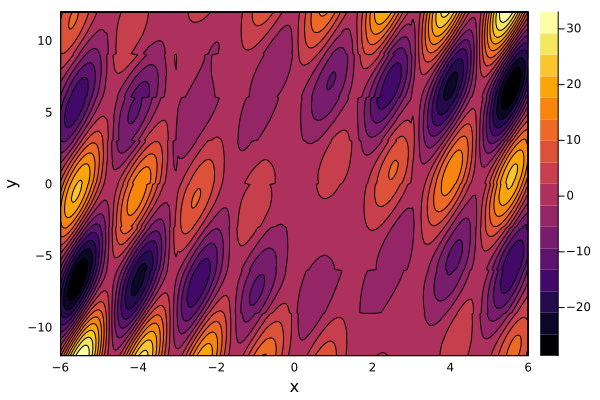

In [58]:
qtt, ranks, errors = quanticscrossinterpolate(
    Float64, f, [xvals, yvals];
    tolerance=1e-8,
    pivottolerance=1e-8,
    maxbonddim=8)
print(last(errors))
qttvals = qtt.(1:256, collect(1:256)')
contour(xvals, yvals, qttvals, fill=true)
xlabel!("x")
ylabel!("y")

In [62]:
import tntorch as tn

t = tn.ones(64, 64)  # 64 x 64 tensor, filled with ones
t = t[:, :, None] + 2*t[:, None, :]  # Singleton dimensions, broadcasting, and arithmetics
print(tn.mean(t))  # Result: 3

LoadError: ArgumentError: Package tntorch not found in current path.
- Run `import Pkg; Pkg.add("tntorch")` to install the tntorch package.